# **Import Libraries**

In [329]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# **Import Data**

In [330]:
hf = pd.read_csv('heart_failure_data/heart_failure_clinical_records_dataset.csv')

**Print Features & Target Variable**

In [331]:
print("Features: \n", np.array(hf.columns[:-1]), "\n")
print("Target variable: \n", hf.columns[-1])

Features: 
 ['age' 'anaemia' 'creatinine_phosphokinase' 'diabetes' 'ejection_fraction'
 'high_blood_pressure' 'platelets' 'serum_creatinine' 'serum_sodium' 'sex'
 'smoking' 'time'] 

Target variable: 
 DEATH_EVENT


# **Split and Normalize the Data**

In [332]:
# split the data in training and testing set (20%)
hf_train, hf_test = train_test_split(hf, test_size=0.2, random_state=25)

# split training and testing data into X and y
X_train, y_train = hf_train.iloc[:,:-1], hf_train.iloc[:,-1]
X_test, y_test = hf_test.iloc[:,:-1], hf_test.iloc[:,-1]

# normalize data using mean normalization
X_train = (X_train - X_train.mean())/X_train.std()
X_test = (X_test - X_test.mean())/X_test.std()

# **Construct Model**

In [333]:
model = SVC(kernel='rbf', class_weight='balanced')

**Prepare the parameters for a GridSearch**

In [334]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 5, 10],
              'gamma': [10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.001, 0.0001]}

**Run GridSearch**

In [335]:
grid = GridSearchCV(model, param_grid, refit = True, verbose=2)
grid.fit(X_train, y_train)
print("\n Best parameters: \n", grid.best_params_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END ..................................C=0.001, gamma=10; total time=   0.0s
[CV] END ..................................C=0.001, gamma=10; total time=   0.0s
[CV] END ..................................C=0.001, gamma=10; total time=   0.0s
[CV] END ..................................C=0.001, gamma=10; total time=   0.0s
[CV] END ..................................C=0.001, gamma=10; total time=   0.0s
[CV] END ...................................C=0.001, gamma=5; total time=   0.0s
[CV] END ...................................C=0.001, gamma=5; total time=   0.0s
[CV] END ...................................C=0.001, gamma=5; total time=   0.0s
[CV] END ...................................C=0.001, gamma=5; total time=   0.0s
[CV] END ...................................C=0.001, gamma=5; total time=   0.0s
[CV] END ...................................C=0.001, gamma=1; total time=   0.0s
[CV] END ...................................C=0

# **Make Predictions**

In [336]:
y_pred = grid.predict(X_test)

# **Results**

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        39
           1       0.80      0.76      0.78        21

    accuracy                           0.85        60
   macro avg       0.84      0.83      0.83        60
weighted avg       0.85      0.85      0.85        60



[Text(0.5, 1.0, 'Confusion Matrix')]

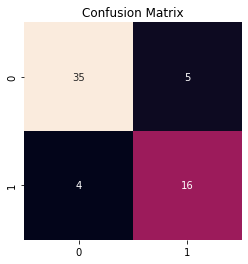

In [337]:
print(classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat.T, square=True, annot=True, fmt='d', cbar=False).set(title='Confusion Matrix')

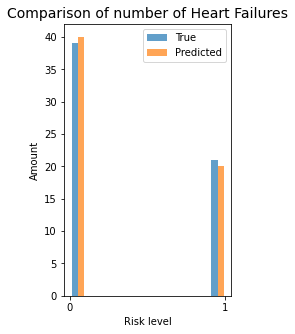

In [338]:
plt.figure(figsize=(3, 5))
plt.title("Comparison of number of Heart Failures", size=(14))
plt.ylabel("Amount")
plt.xlabel("Risk level")
plt.hist([y_test, y_pred], alpha=0.7, label=["True", "Predicted"])
plt.xticks([0, 1])
plt.legend()
plt.show()